# Project 3 - Part 1, Git Practice, APS1070 Fall 2024

**Deadline: Nov 8th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: **Alton Rego**  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: **1004909307**

## Part 1: Getting started with GitHub [1.5 Marks + 1.5 Mark Git Submission]

For the first part of this project, we will work on a [global economy indicators dataset](https://www.kaggle.com/datasets/prasad22/global-economy-indicators) that reports the Gross Domestic Product (GDP) from 1970 onwards for more than 200 countries and areas of the world.

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your list of counries as inputs (Afghanistan, Albania, Algeria, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each year should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on both the original as well as the standardized dataset for the ` Albania `,` Greece `,` Somalia `,` Sweden `,` Oman `, and ` Italy `.   **[0.25]**
4. Discuss the trends in the standardized time-series for ` Albania `,` Greece `,` Somalia `,` Sweden `,` Oman `, and ` Italy `. What does it mean if the curve goes up or down? What does the sign of values indicate? **[0.5]**

In [ ]:
import pandas as pd
data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/domestic_product.csv',
    index_col=0
)

In [ ]:
## Visualizing the data

import pandas as pd

data_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/domestic_product.csv',
    index_col=0
)

print(data_raw.head(10))

                              1970          1971          1972          1973  \
 Country                                                                       
Afghanistan           1.731436e+09  1.812838e+09  1.647900e+09  1.702716e+09   
Albania               2.265577e+09  2.330585e+09  2.397526e+09  2.466543e+09   
Algeria               5.155121e+09  5.363676e+09  7.176428e+09  9.229622e+09   
Andorra               9.947679e+07  1.131285e+08  1.435060e+08  1.908638e+08   
Angola                3.806982e+09  4.007445e+09  4.102155e+09  5.016276e+09   
Anguilla              3.902380e+06  4.589878e+06  5.416747e+06  6.129013e+06   
Antigua and Barbuda   3.386582e+07  4.115606e+07  5.640549e+07  7.836033e+07   
Argentina             3.398453e+10  4.065625e+10  3.831047e+10  4.314063e+10   
Aruba                 1.976240e+08  2.081589e+08  2.192555e+08  2.309436e+08   
Australia             4.521665e+10  5.046958e+10  5.940280e+10  8.580277e+10   

                              1974     

# Q1. Function to plot time-series for the input list

In [ ]:
import matplotlib.pyplot as plt

def plot_gdp_time_series(df, countries):
    """
    Plots time-series GDP data for each specified country in separate subplots.

    Parameters:
    df (pd.DataFrame): The GDP dataframe with countries as rows and years as columns.
    countries (list): List of countries to plot.

    Returns:
    None
    """

    # Extract the data for the specified countries
    data = df.loc[countries]

    # Set up the figure and subplots
    fig, axes = plt.subplots(len(countries), 1, figsize=(10, 15), sharex=True)
    fig.suptitle("GDP Time Series for Selected Countries (Original Data)")

    # Plot each country's time-series in a separate subplot
    for i, country in enumerate(countries):
        axes[i].plot(data.columns, data.loc[country], label=country)
        axes[i].set_title(country)
        axes[i].set_ylabel("GDP")
        axes[i].legend()

    # Rotate x-axis labels for all subplots using plt.xticks()
    plt.xticks(rotation=45, ha='right')

    plt.xlabel("Year")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


# Q2. Apply StandardScalar to the data

Apply StandardScalar to the data. Each year should have a mean of zero and a StD of 1. [0.25]

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming your GDP data is in a DataFrame called `df`
scaler = StandardScaler()

# Transpose the dataframe, apply the scaler, and transpose back
standardized_df = pd.DataFrame(scaler.fit_transform(data_raw.T).T, index=data_raw.index, columns=data_raw.columns)

# Now `standardized_df` contains the standardized GDP data

In [ ]:
# prompt: show head of standardized df

print(standardized_df.head())

                  1970      1971      1972      1973      1974      1975  \
 Country                                                                   
Afghanistan  -0.833578 -0.820925 -0.846562 -0.838042 -0.782239 -0.742133   
Albania      -0.755018 -0.741864 -0.728319 -0.714354 -0.700094 -0.685304   
Algeria      -1.244898 -1.241549 -1.212438 -1.179466 -1.114746 -1.077878   
Andorra      -1.288180 -1.277327 -1.253176 -1.215526 -1.179598 -1.145842   
Angola       -0.763397 -0.758717 -0.756506 -0.735166 -0.720910 -0.755449   

                  1976      1977      1978      1979  ...      2012      2013  \
 Country                                              ...                       
Afghanistan  -0.712005 -0.657392 -0.601742 -0.538355  ...  1.871779  1.947212   
Albania      -0.670000 -0.654824 -0.638327 -0.733422  ...  1.279374  1.371743   
Algeria      -1.042637 -0.990592 -0.904150 -0.794505  ...  2.028626  2.044685   
Andorra      -1.138628 -1.111755 -1.057411 -0.953267  ...  1.1

# Q3. Run the function on the Original as well as the Standardized dataset

Run the function in step 1 on both the original as well as the standardized dataset for the Albania,Greece,Somalia,Sweden,Oman, and Italy. [0.25]

Original Data:


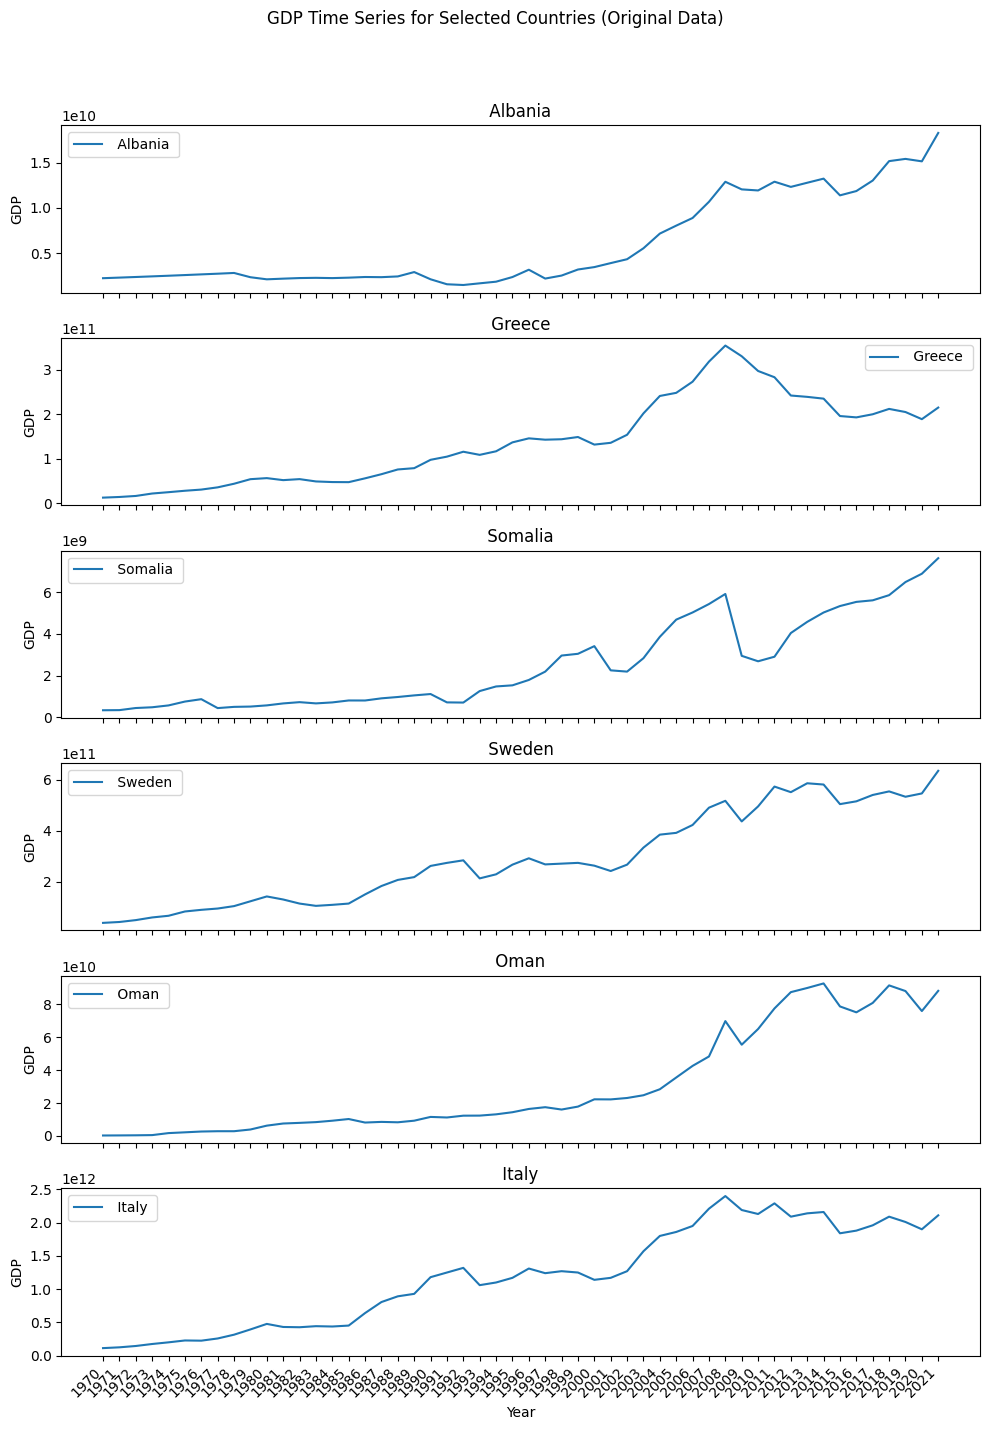

Standardized Data:


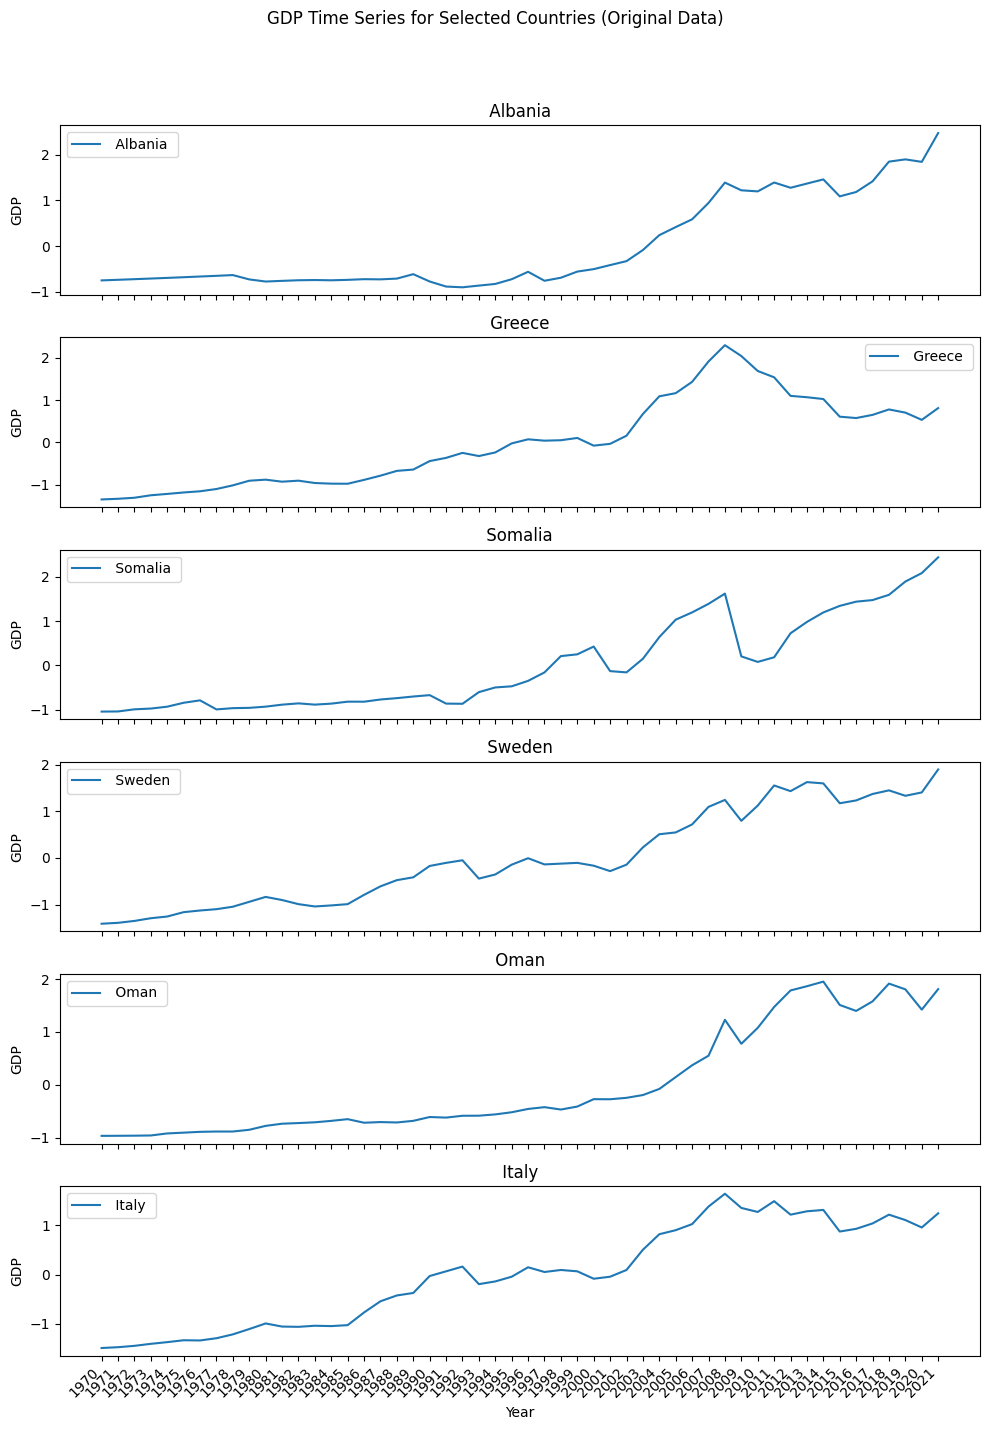

In [ ]:
# List of countries to analyze
countries_to_analyze = [' Albania ', ' Greece ', ' Somalia ', ' Sweden ', ' Oman ',  ' Italy ']

# Plotting original data
print("Original Data:")
plot_gdp_time_series(data_raw, countries_to_analyze)

# Plotting standardized data
print("Standardized Data:")
plot_gdp_time_series(standardized_df, countries_to_analyze)


# Q4. Discussion on trends

Discuss the trends in the standardized time-series for Albania,Greece,Somalia,Sweden,Oman, and Italy. What does it mean if the curve goes up or down? What does the sign of values indicate? [0.5]

Analysis of Country's Standardized Data Trends:



*   Overall, all countries have experienced GDP growth between 1970 to 2021
*   All countries experienced a downward trend in GDP growth in 2008, likely caused by the US housing market crash and subsequent economic impacts. Most of the countries seem to have recovered after 2008.
*   Greece has seen a consistent YOY downward trend after 2008
*   Italy has seen plateauing growth after 2008 - the graph of the countries GDP growth shows upward and downward YOY trends that cancel each other out.
*   Albania, Somalia, Oman, and Sweden are showing very strong upward trends. By 2021, they reached around 2 standard deviations from the mean based on their entire historical data.


Upward Trend:

An upward trend in the standardized time series for a country indicates a period where that country's GDP was increasing relative to its own historical average.
This means the country was experiencing above-average GDP growth compared to its entire historical trend.

Downward Trend:

A downward trend reflects a period where that country’s GDP was below its own historical average, meaning slower or negative growth relative to its own past performance.
For example, if Greece's curve goes down, it shows that its GDP growth was below Greece’s historical average for that period.

Sign of Values:

Positive values indicate that the GDP for a specific year was above that country’s historical average.
Negative values indicate that the GDP for a specific year was below that country’s historical average.
For instance, a positive standardized value for Italy in a particular year means Italy’s GDP was above its average GDP for the entire period, while a negative value would mean it was below its average.